# Exercise III - Classification (Week 6 & 7) 

This exercise focuses on building a model with suitable features for classification tasks based on the content taught in Week 6 - Classification and Week 7 - Random Forests and Feature Engineering.

### Dataset: Prep (Data Cleaning) & Overview

In [1]:
import pandas as pd
import numpy as np
# for data visualisation, plotting
import matplotlib.pyplot as plt
# for colormap
from matplotlib import colormaps 
# for ml
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [2]:
# not use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

The main dataset used in this exercise is the same one that was used in the exerciese 3 - regression [Kaggle - Housing in London](https://www.kaggle.com/datasets/justinas/housing-in-london) by JUSTINAS CIRTAUTAS, which is centered around the housing market of London with a lot of additional relevant data (e.g., population size, mean salary). I was hoping to conduct both regression and classification tasks on a same datset to see what interesting relatinships and findings I can draw. 

Another dataset used for random forests is also obtained from Kaggle - [Titanic Dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset), using the classification to determine what types of passengers has the greatest chance of survival.

In [3]:
# https://www.kaggle.com/datasets/justinas/housing-in-london- the same dataset used in Exercise 3
# split by borough, remove columns splited by other geographical regions to avoid duplications
# salary, population per year
df_yearly = pd.read_csv("./data/housing_in_london_yearly_variables.csv")
df_yearly = df_yearly[df_yearly['borough_flag'] == 1]

# avg. housing price per month
df_monthly = pd.read_csv("./data/housing_in_london_monthly_variables.csv")
df_monthly = df_monthly[df_monthly['borough_flag'] == 1]

In [4]:
df_yearly = df_yearly.drop('borough_flag', axis=1)
df_monthly = df_monthly.drop('borough_flag', axis=1)

In [5]:
# convert date to year
df_yearly['date'] = pd.to_datetime(df_yearly['date'])
df_yearly['year'] = df_yearly['date'].dt.year
df_yearly['date'] = df_yearly['year']

df_monthly['date'] = pd.to_datetime(df_monthly['date'])
df_monthly['year'] = df_monthly['date'].dt.year
df_monthly['date'] = df_monthly['year']

In [6]:
avg_price_per_year = df_monthly.groupby(['date', 'area']).agg({'average_price': 'mean'}).reset_index()

In [7]:
df = pd.merge(df_yearly, avg_price_per_year, how='left', left_on=['date', 'area'], right_on=['date', 'area'])
df = df.drop(['life_satisfaction', 'recycling_pct', 'number_of_jobs', 'area_size', 'no_of_houses', 'year'], axis=1)
order = ['code', 'date', 'area', 'average_price', 'median_salary', 'mean_salary', 'population_size']
df = df[order]
df = df.drop(['code'], axis=1)

In [8]:
columns_to_convert = ['average_price', 'median_salary', 'mean_salary', 'population_size']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [9]:
df = df.dropna()
df

,date,area,average_price,median_salary,mean_salary,population_size
0,1999,city of london,171300.08333,33020.00000,48922.00000,6581.00000
1,1999,barking and dagenham,65320.83333,21480.00000,23620.00000,162444.00000
2,1999,barnet,136004.41667,19568.00000,23128.00000,313469.00000
3,1999,bexley,86777.66667,18621.00000,21386.00000,217458.00000
4,1999,brent,112157.41667,18532.00000,20911.00000,260317.00000
...,...,...,...,...,...,...
655,2018,sutton,379262.58333,28853.00000,32442.00000,204525.00000
656,2018,tower hamlets,446500.41667,49237.00000,69806.00000,317705.00000
657,2018,waltham forest,440859.41667,30298.00000,32875.00000,276700.00000
658,2018,wandsworth,596649.16667,34501.00000,45317.00000,326474.00000


### Decision Tree

In [10]:
# making copies
dfa = df.copy()
dfb = df.copy()
dfc = df.copy()

##### Decision Tree with 2 Features

`Median_Salary`, `Population_size` - max_depth = 4, accuracy = 95.35% 

The same features appear to be effective in building models for classification tasks but perform poorly in regression tasks (refer to Exercise 3 – Part 3.1 Linear Regression). This could suggest that non-linear models (e.g., decision trees) are able to handle much more complex relationships between features and a categorical target.

While the high accuracy % suggests the model performs well on the test dataset, the precision, recall, and f1-score all suggest that the model has difficulty in correctly classifying most of class 1 (expensive areas). This might be resulted from the imbalanced class – as the most of areas are labelled as normal areas. 

In [11]:
dfa

,date,area,average_price,median_salary,mean_salary,population_size
0,1999,city of london,171300.08333,33020.00000,48922.00000,6581.00000
1,1999,barking and dagenham,65320.83333,21480.00000,23620.00000,162444.00000
2,1999,barnet,136004.41667,19568.00000,23128.00000,313469.00000
3,1999,bexley,86777.66667,18621.00000,21386.00000,217458.00000
4,1999,brent,112157.41667,18532.00000,20911.00000,260317.00000
...,...,...,...,...,...,...
655,2018,sutton,379262.58333,28853.00000,32442.00000,204525.00000
656,2018,tower hamlets,446500.41667,49237.00000,69806.00000,317705.00000
657,2018,waltham forest,440859.41667,30298.00000,32875.00000,276700.00000
658,2018,wandsworth,596649.16667,34501.00000,45317.00000,326474.00000


In [12]:
# labelling method 1 - imbalance labelling
# define expensive and normal areas 
# reference code: https://stackoverflow.com/questions/60481193/how-to-select-rows-in-a-dataframe-based-on-an-or-operator-of-values-of-a-colum
# reference code: https://stackoverflow.com/questions/39078781/filter-a-pandas-data-frame-on-all-rows-that-do-not-meet-a-condition
expensive_conditions = (dfa["area"] == "kensington and chelsea") | (dfa["area"] == "westminster")
normal_conditions = ~expensive_conditions

# create a new column to store labels 
dfa.loc[expensive_conditions, 'type'] = 'expensive_areas'
dfa.loc[normal_conditions, 'type'] = 'normal_areas'

# encoding on new columns based on type
dfa.loc[(dfa["type"]=="normal_areas"), 'types'] = 0 
dfa.loc[(dfa["type"]=="expensive_areas"), 'types'] = 1

dfa.drop(["area", "type"], axis=1, inplace=True)
dfa

,date,average_price,median_salary,mean_salary,population_size,types
0,1999,171300.08333,33020.00000,48922.00000,6581.00000,0.00000
1,1999,65320.83333,21480.00000,23620.00000,162444.00000,0.00000
2,1999,136004.41667,19568.00000,23128.00000,313469.00000,0.00000
3,1999,86777.66667,18621.00000,21386.00000,217458.00000,0.00000
4,1999,112157.41667,18532.00000,20911.00000,260317.00000,0.00000
...,...,...,...,...,...,...
655,2018,379262.58333,28853.00000,32442.00000,204525.00000,0.00000
656,2018,446500.41667,49237.00000,69806.00000,317705.00000,0.00000
657,2018,440859.41667,30298.00000,32875.00000,276700.00000,0.00000
658,2018,596649.16667,34501.00000,45317.00000,326474.00000,0.00000


In [13]:
# pick two features
feature1 = "median_salary"
feature2 = "population_size"

#pick max_depth
max_depth = 4

Accuracy: 95.34883720930233
Confusion Matrix: [[120   2]
 [  4   3]]
Class Report:               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       122
         1.0       0.60      0.43      0.50         7

    accuracy                           0.95       129
   macro avg       0.78      0.71      0.74       129
weighted avg       0.95      0.95      0.95       129



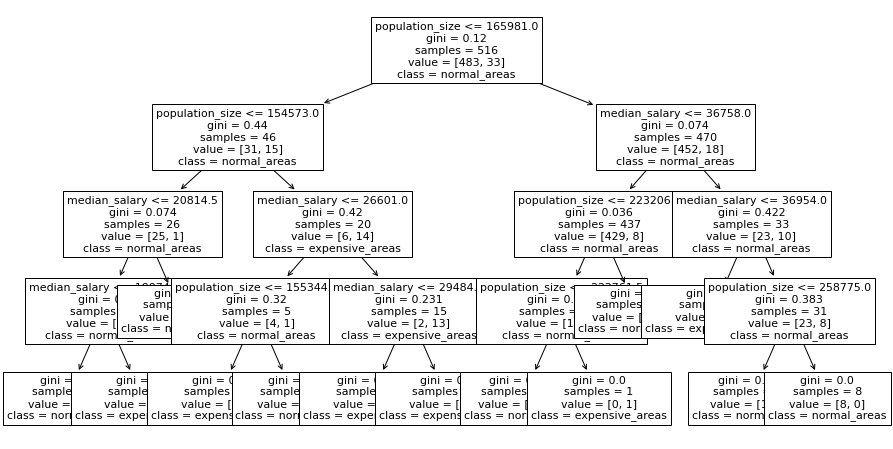

In [14]:
# code inherited from lecture notebook
# train model, plot decision boundary 
x = dfa[[feature1, feature2]].values
y = pd.to_numeric(dfa["types"])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)

# see if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]

# more metrics found in: https://scikit-learn.org/stable/modules/model_evaluation.html
acc = (total - num_incorrect) / total * 100
conf = confusion_matrix(y_test, y_pred)
classi = classification_report(y_test, y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:", conf)
print("Class Report:", classi)

plt.figure(figsize=(15,8))
my_tree = plot_tree(model, feature_names=[feature1, feature2],fontsize=11, class_names = ["normal_areas", "expensive_areas"]) 

In [15]:
# https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
# plot decision boundarys
def plot_decision(X,y,model,n_classes=2):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = np.arange(min1, max1, 100) # need to change the size of step based on the dataset, or it will crash the kernel if data is too big...
    x2grid = np.arange(min2, max2, 100)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    model.fit(X, y)
    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='binary_r')
    for class_value in range(n_classes):
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')

<ipython-input-15-acc02c7267e5>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


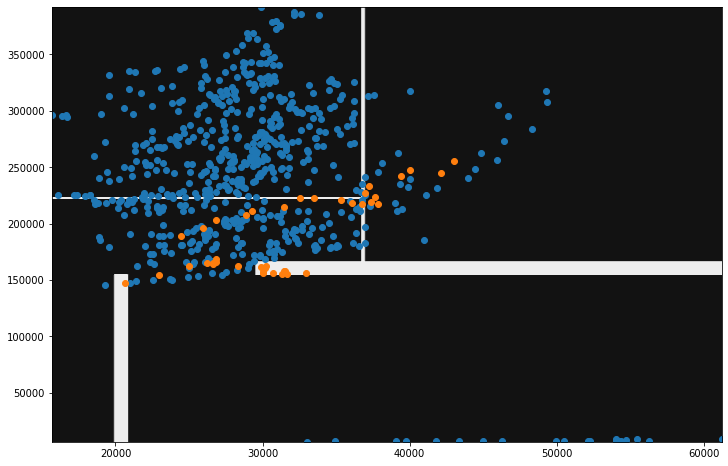

In [16]:
plt.figure(figsize=(12,8))

# set bounds to min and max values of features 
plt.xlim([np.min(x[:,0]),np.max(x[:,0])])
plt.ylim([np.min(x[:,1]),np.max(x[:,1])])
plot_decision(x, y, model, 2)

##### Decision Tree with all Features

max depth = 4, accuracy = 98.45%, better than 2 features model

However, similar to the previous model, the performance metrics for class 1 (expensive areas) are not as good as those for class (normal areas), suggesting an imbalance class.

- 'average_price' is the most significant predictor, with an importance score of approximately 0.48247.  
- 'mean_salary' and 'median_salary' only have an importance score of around 0.05 - not much predictive power?

In [17]:
# now pick all features for input
x_labels = list(dfa.columns.values)
x_labels.remove("types")
x = dfa.iloc[:, :-1]  # features: all columns except the last one
y = dfa.iloc[:, -1]   # target: the last column

Accuracy: 98.44961240310077
Confusion Matrix: [[122   1]
 [  1   5]]
Class Report:               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       123
         1.0       0.83      0.83      0.83         6

    accuracy                           0.98       129
   macro avg       0.91      0.91      0.91       129
weighted avg       0.98      0.98      0.98       129



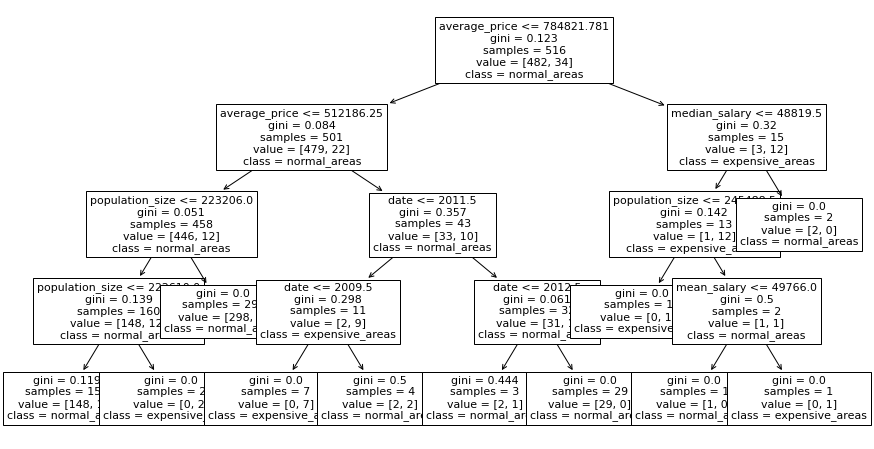

In [18]:
# fit model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)

# see if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100
conf = confusion_matrix(y_test, y_pred)
classi = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:", conf)
print("Class Report:", classi)

plt.figure(figsize=(15,8))
my_plot = plot_tree(model, feature_names=x_labels,fontsize=11, class_names = ["normal_areas", "expensive_areas"]) 

In [19]:
# get feature importances
feature_importances = model.feature_importances_
importances = pd.Series(feature_importances, index=x_labels)
sorted_importances = importances.sort_values(ascending=False)
sorted_importances

average_price     0.48247
date              0.28987
population_size   0.13228
median_salary     0.07126
mean_salary       0.02412
dtype: float64

the above result shows that the model has some quite promising results in terms of accuracy, however, looking at the accuracy alone might be problematic, as the labelling method used here resulted in a very imbalance dataset
- the model is very effective at identifying class 0 (normal areas) 
- but struggles more with class 1 (expensive areas)

#### so how it works if using different labels?

- Metropolitan borough
- Municipal borough
- County borough
- Urban district

or, 
- Inner borough
- Outer borough

labels found on https://en.wikipedia.org/wiki/London_boroughs

With new labelling method, the accuracy has significantly dropped.

However, since the first labelling method led to a highly imbalanced dataset, which might skew the results. The second attempt adjusted the labeling which reduced the class imbalance, resulting in more balanced evaluation metrics.

In [20]:
# 80% training data and 20% testing data
# training set (X_train, y_train)
# test set (X_test, y_test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
dfb

,date,area,average_price,median_salary,mean_salary,population_size
0,1999,city of london,171300.08333,33020.00000,48922.00000,6581.00000
1,1999,barking and dagenham,65320.83333,21480.00000,23620.00000,162444.00000
2,1999,barnet,136004.41667,19568.00000,23128.00000,313469.00000
3,1999,bexley,86777.66667,18621.00000,21386.00000,217458.00000
4,1999,brent,112157.41667,18532.00000,20911.00000,260317.00000
...,...,...,...,...,...,...
655,2018,sutton,379262.58333,28853.00000,32442.00000,204525.00000
656,2018,tower hamlets,446500.41667,49237.00000,69806.00000,317705.00000
657,2018,waltham forest,440859.41667,30298.00000,32875.00000,276700.00000
658,2018,wandsworth,596649.16667,34501.00000,45317.00000,326474.00000


In [22]:
# labelling method 2 - improved imbalance, but not perfect
# define the conditions for inner and outer areas
innerboroughs = ["camden", "greenwich", "hackney", "hammersmith and fulham", "islington", "kensington and chelsea", "lambeth", "lewisham", "southwark", "tower hamlets", "wandsworth", "westminster"]

# filter the data based on the above categories
# reference code: https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
inner = dfb["area"].isin(innerboroughs)
outer = ~inner

# create new column to store labels
dfb.loc[inner, 'type'] = 'inner_boroguh'
dfb.loc[outer, 'type'] = 'outer_boroguh'

# encoding on new columns based on 'type' values
dfb.loc[(dfb["type"]=="inner_boroguh"), 'label'] = 0 
dfb.loc[(dfb["type"]=="outer_boroguh"), 'label'] = 1
dfb.drop(["area", "type"], axis=1, inplace=True)
dfb

,date,average_price,median_salary,mean_salary,population_size,label
0,1999,171300.08333,33020.00000,48922.00000,6581.00000,1.00000
1,1999,65320.83333,21480.00000,23620.00000,162444.00000,1.00000
2,1999,136004.41667,19568.00000,23128.00000,313469.00000,1.00000
3,1999,86777.66667,18621.00000,21386.00000,217458.00000,1.00000
4,1999,112157.41667,18532.00000,20911.00000,260317.00000,1.00000
...,...,...,...,...,...,...
655,2018,379262.58333,28853.00000,32442.00000,204525.00000,1.00000
656,2018,446500.41667,49237.00000,69806.00000,317705.00000,0.00000
657,2018,440859.41667,30298.00000,32875.00000,276700.00000,1.00000
658,2018,596649.16667,34501.00000,45317.00000,326474.00000,0.00000


Accuracy: 74.4186046511628
Confusion Matrix: [[26 20]
 [13 70]]
Class Report:               precision    recall  f1-score   support

         0.0       0.67      0.57      0.61        46
         1.0       0.78      0.84      0.81        83

    accuracy                           0.74       129
   macro avg       0.72      0.70      0.71       129
weighted avg       0.74      0.74      0.74       129



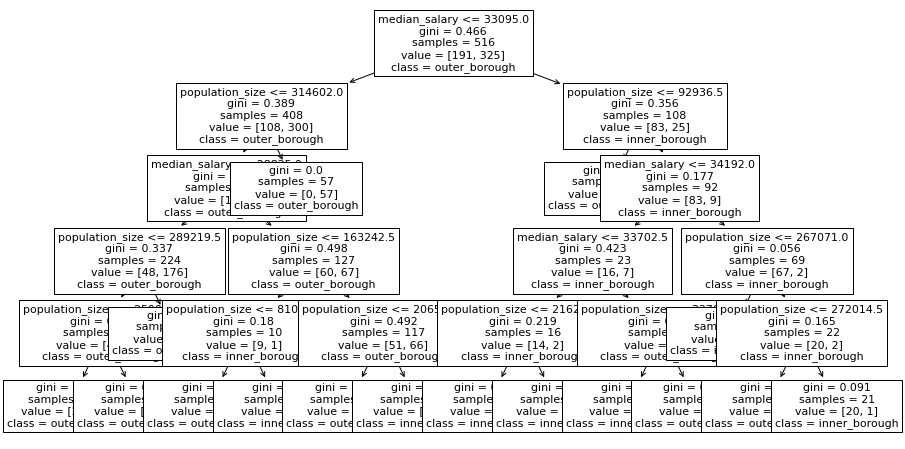

In [23]:
# 2 features decision tree
feature1 = "median_salary"
feature2 = "population_size"

#pick max_depth
max_depth = 5

# train model, plot decision boundary 
x = dfb[[feature1, feature2]].values
y = pd.to_numeric(dfb["label"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)

# see if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]

acc = (total - num_incorrect) / total * 100
conf = confusion_matrix(y_test, y_pred)
classi = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:", conf)
print("Class Report:", classi)

plt.figure(figsize=(15,8))
my_tree = plot_tree(model, feature_names=[feature1, feature2], fontsize=11, class_names = ["inner_borough", "outer_borough"]) 

<ipython-input-15-acc02c7267e5>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


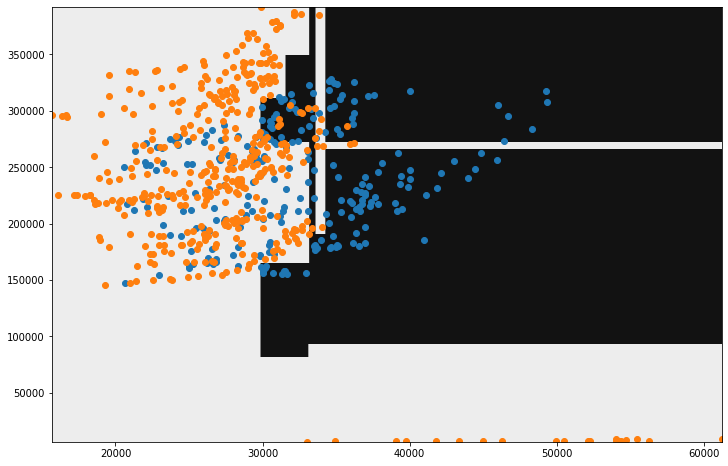

In [24]:
plt.figure(figsize=(12,8))

# set bounds to min and max values of features 
plt.xlim([np.min(x[:,0]),np.max(x[:,0])])
plt.ylim([np.min(x[:,1]),np.max(x[:,1])])
plot_decision(x, y, model, 2)

the graph here looks a lot better compared to what we got by using a very imbalance dataset

In [25]:
# multiple features decision tree
# pick all features for input
x_labels = list(dfb.columns.values)
x_labels.remove("label")
x = dfb.iloc[:, :-1]  # features: all columns except the last one
y = dfb.iloc[:, -1]   # target: the last column

In [26]:
#pick max_depth
max_depth = 5

Accuracy: 79.84496124031007
Confusion Matrix: [[24 21]
 [ 5 79]]
Class Report:               precision    recall  f1-score   support

         0.0       0.83      0.53      0.65        45
         1.0       0.79      0.94      0.86        84

    accuracy                           0.80       129
   macro avg       0.81      0.74      0.75       129
weighted avg       0.80      0.80      0.79       129



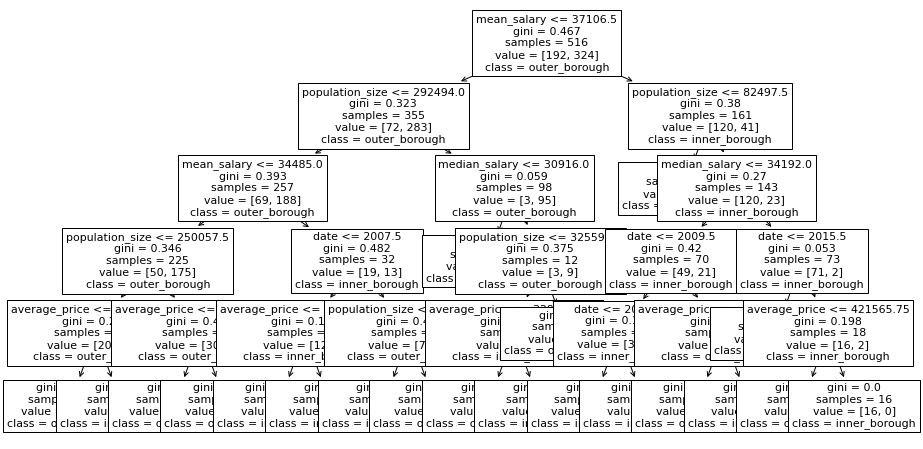

In [27]:
# fit model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)

# see if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100
conf = confusion_matrix(y_test, y_pred)
classi = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:", conf)
print("Class Report:", classi)

plt.figure(figsize=(15,8))
my_plot = plot_tree(model, feature_names=x_labels,fontsize=11, class_names = ["inner_borough", "outer_borough"]) 

In [28]:
# get feature importances
feature_importances = model.feature_importances_
importances = pd.Series(feature_importances, index=x_labels)
sorted_importances = importances.sort_values(ascending=False)
sorted_importances

mean_salary       0.46316
population_size   0.29155
date              0.10962
average_price     0.09358
median_salary     0.04208
dtype: float64

In [29]:
# fit the random forest model
model = RandomForestClassifier(oob_score=True, random_state=42, n_estimators=500, n_jobs=-1)
model.fit(x, y)
print("OOB accuracy", model.oob_score_)

OOB accuracy 0.8635658914728682


In [30]:
# fit the adaboost model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = AdaBoostClassifier(n_estimators=500, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy",accuracy)

accuracy 0.8294573643410853


### Random Forest - Dataset I - Housing in London

By selecting the two features with the highest importance scores from the previous decision tree (‘mean_salary’ and ‘population_size’) and fitting them to the Random Forest Model will give us a model accuracy of 0.423 accuracy. 

Adding in more features about date, median salary, average price significantly improves accuracy than using just 'mean_salary' and 'population_size' alone.

In [31]:
dfc

,date,area,average_price,median_salary,mean_salary,population_size
0,1999,city of london,171300.08333,33020.00000,48922.00000,6581.00000
1,1999,barking and dagenham,65320.83333,21480.00000,23620.00000,162444.00000
2,1999,barnet,136004.41667,19568.00000,23128.00000,313469.00000
3,1999,bexley,86777.66667,18621.00000,21386.00000,217458.00000
4,1999,brent,112157.41667,18532.00000,20911.00000,260317.00000
...,...,...,...,...,...,...
655,2018,sutton,379262.58333,28853.00000,32442.00000,204525.00000
656,2018,tower hamlets,446500.41667,49237.00000,69806.00000,317705.00000
657,2018,waltham forest,440859.41667,30298.00000,32875.00000,276700.00000
658,2018,wandsworth,596649.16667,34501.00000,45317.00000,326474.00000


In [32]:
from sklearn.preprocessing import LabelEncoder
encoded_area = LabelEncoder().fit_transform(dfc["area"])
print(encoded_area)
print(len(encoded_area), len(dfc["area"]))
print(np.unique(encoded_area))

[ 6  0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32  6  0  1  2  3  4  5  7  8  9 10 12 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32  6  0  1  2  3  4  5  7
  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
  6  0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32  6  0  1  2  3  4  5  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32  6  0  2  3  4  5
  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 26 27 28 29 30 31 32
  6  0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32  6  0  1  2  3  5  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32  6  0  1  2  3  4  5
  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32  6  0  1  2  3  4  5  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32  6  0  1  2  3  4  5

In [33]:
dfc["area_label"] = encoded_area

In [34]:
def get_dataset(features):
    # # filter just features
    # df_features = df.loc[:, features]
    # X = df_features.values.copy()
    # y = df['']
    # # filter genres and add label column
    # df_features.loc[df['genres'].str.startswith('Action'),"label"] = 0
    # df_features.loc[~df['genres'].str.startswith('Action') & df['genres'].str.contains('Adventure'),"label"] = 1
    # df_features.loc[~df['genres'].str.startswith('Action') & ~df['genres'].str.contains('Adventure'),"label"] = 2

    X = dfc.loc[:, features].values.copy()
    y = dfc["area_label"]
    
    return X, y

def train(dataset, rf = True):
    X, y = dataset
    # fit the model
    if rf:
        model = RandomForestClassifier(oob_score=True, random_state=42, n_estimators=500, n_jobs=-1)
        model.fit(X, y)
        print("OOB accuracy", model.oob_score_)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = AdaBoostClassifier(n_estimators=500, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("accuracy",accuracy)

    # return feature importances
    feature_importances = model.feature_importances_
    print("Feature Importances:", feature_importances)

In [35]:
features = ["mean_salary", "population_size"]
train(get_dataset(features))

OOB accuracy 0.4232558139534884
Feature Importances: [0.46210708 0.53789292]


In [36]:
features = features + ["median_salary", "date", "average_price"]
train(get_dataset(features))

OOB accuracy 0.7116279069767442
Feature Importances: [0.19979877 0.34013924 0.1674578  0.10768326 0.18492093]


### Random Forest - Dataset II - Titanic

By selecting 'fare' and 'Pclass', the Random Forest model yields an accuracy of 0.693 - adding feature 'gender' also significantly improve the model accuracy, suggesting that gender has a high effect on passengers chance of survival.


#### dataset pre-processing

- most cabin information is missing - hence drop the whole column from the dataset
- quite a few age (as well as embarked) information is missing - instead of dropping the columns, I replaced the missing value with mean +- 10 and mode.
- the updated df has 891 rows × 9 columns, providing information on survival status (0 = No, 1 = Yes), ticket class (1 = 1st, 2 = 2nd, 3 = 3rd), passenger name, gender, age, No. of siblings/spouses aboard the Titanic, No. of parents/children aboard the Titanic, ticket fare, and embarkation point.
- imbalnced dataset? - the count of people who survived is less (38%) than the count of people who didn’t survive

In [37]:
dfd_train = pd.read_csv("data/titanic-dataset-train.csv")

In [38]:
# any missing values?
# reference code found in: https://note.nkmk.me/en/python-pandas-nan-judge-count/
dfd_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
titanic = [dfd_train]
mean = dfd_train["Age"].mean()

for dataset in titanic:
    nan_num = dataset["Age"].isnull().sum()
    random_age = np.random.randint(mean - 10, mean + 10, size = nan_num)
    # replace missing value with random number (mean+-10)
    # reference code: https://stackoverflow.com/questions/6736590/fast-check-for-nan-in-numpy
    nan = dataset["Age"][np.isnan(dataset["Age"])].index
    dataset.loc[nan, "Age"] = random_age
    # replacing missing value with mode
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

# reference code: https://www.geeksforgeeks.org/python-pandas-dataframe-astype/
dfd_train["Age"] = dfd_train["Age"].astype(int)
dfd_train["Embarked"] = dfd_train["Embarked"].astype(str)

In [40]:
# too many missing valus for cabin - remove the column
dfd_train = dfd_train.drop(["Cabin", "PassengerId", "Ticket"], axis=1)

In [41]:
dfd_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.25000,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.28330,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.92500,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.10000,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.05000,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.00000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.00000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,23.45000,S
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.00000,C


<Axes: ylabel='count'>

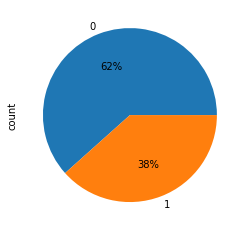

In [42]:
# reference code: https://www.statology.org/pandas-pie-chart/
# reference code: https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
dfd_train["Survived"].value_counts(dropna=False).plot(kind="pie", autopct='%1.0f%%')

# 38% of the dataset survived

#### modelling



In [43]:
def get_dataset(features):
    X = dfd_train.loc[:, features].values.copy()
    y = dfd_train["Survived"]
    
    return X, y

def train(dataset, rf = True):
    X, y = dataset
    # fit the model
    if rf:
        model = RandomForestClassifier(oob_score=True, random_state=42, n_estimators=500, n_jobs=-1)
        model.fit(X, y)
        print("OOB accuracy", model.oob_score_)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = AdaBoostClassifier(n_estimators=500, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("accuracy",accuracy)

    # return feature importances
    feature_importances = model.feature_importances_
    print("Feature Importances:", feature_importances)

##### Out of Bag Accuracy

Seems like that survival rate is associated with ticket class and fare

In [44]:
features = ["Pclass"]
train(get_dataset(features))

OOB accuracy 0.6790123456790124
Feature Importances: [1.]


In [45]:
features = ["Fare"]
train(get_dataset(features))

OOB accuracy 0.6936026936026936
Feature Importances: [1.]


In [46]:
features = ["Pclass", "Fare"]
train(get_dataset(features))

OOB accuracy 0.6936026936026936
Feature Importances: [0.13929261 0.86070739]


In [47]:
features = features + ["Age"]
train(get_dataset(features))

OOB accuracy 0.6677890011223344
Feature Importances: [0.08919464 0.49614478 0.41466058]


In [48]:
features = features + ["SibSp"]
train(get_dataset(features))

OOB accuracy 0.6689113355780022
Feature Importances: [0.08764715 0.4416127  0.41065037 0.06008979]


In [49]:
features = features + ["Parch"]
train(get_dataset(features))

OOB accuracy 0.6857463524130191
Feature Importances: [0.08655816 0.41882776 0.39161003 0.05684578 0.04615827]


#### would gender affects the chance of survival?

Yes! - passenger's gender seems to have a high effect on their chance of survival

In [50]:
# categorical encoding - gender?
dfd_train["Sex"].value_counts().head(20)

Sex
male      577
female    314
Name: count, dtype: int64

In [51]:
dfd_test["Sex"].value_counts().head(20)

NameError: name 'dfd_test' is not defined

In [ ]:
# assign female = 0, male = 1
dfd_train.loc[dfd_train['Sex'].str.contains('female'), 'gender'] = 0
dfd_train.loc[~dfd_train['Sex'].str.contains('female'), 'gender'] = 1
dfd_test.loc[dfd_test['Sex'].str.contains('female'), 'gender'] = 0
dfd_test.loc[~dfd_test['Sex'].str.contains('female'), 'gender'] = 1

In [ ]:
dfd_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,gender
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.25000,S,1.00000
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.28330,C,0.00000
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.92500,S,0.00000
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.10000,S,0.00000
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.05000,S,1.00000
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.00000,S,1.00000
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.00000,S,0.00000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,23.45000,S,0.00000
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.00000,C,1.00000


In [ ]:
features = ["Pclass", "Fare"]
features = features + ["gender"]
train(get_dataset(features))

OOB accuracy 0.8204264870931538
Feature Importances: [0.10834905 0.54614096 0.34550999]


#### and how about adding other features?

The accuracy dropped after adding this new feature, indicating that a passenger’s embarkation point also seems to be irrelevant to their survival rate.

In [ ]:
features = ["Pclass", "Fare", "gender"]
features = features + ["Age"]
train(get_dataset(features))

OOB accuracy 0.8080808080808081
Feature Importances: [0.09841051 0.32605562 0.27931433 0.29621955]


In [ ]:
features = ["Pclass", "Fare", "gender"]
features = features + ["Parch"]
train(get_dataset(features))

OOB accuracy 0.8148148148148148
Feature Importances: [0.11565975 0.48068444 0.34593304 0.05772278]


In [ ]:
features = ["Pclass", "Fare", "gender"]
features = features + ["SibSp"]
train(get_dataset(features))

OOB accuracy 0.8125701459034792
Feature Importances: [0.10820629 0.48881663 0.34629487 0.0566822 ]


In [ ]:
# encode 'embarked' column
from sklearn.preprocessing import LabelEncoder
encoded_embarked = LabelEncoder().fit_transform(dfd_train["Embarked"])
print(encoded_embarked)
print(len(encoded_embarked), len(dfd_train["Embarked"]))
print(np.unique(encoded_embarked))

In [ ]:
dfd_train["Encoded_embarked"] = encoded_embarked

In [ ]:
dfd_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,gender,Encoded_embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.25000,S,1.00000,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.28330,C,0.00000,0
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.92500,S,0.00000,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.10000,S,0.00000,2
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.05000,S,1.00000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.00000,S,1.00000,2
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.00000,S,0.00000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,23.45000,S,0.00000,2
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.00000,C,1.00000,0


In [ ]:
features = ["Pclass", "Fare", "gender"]
features = features + ["Encoded_embarked"]
train(get_dataset(features))

OOB accuracy 0.8170594837261503
Feature Importances: [0.11693745 0.49143569 0.35486526 0.0367616 ]


In [ ]:
features = ["Pclass", "Fare", "gender"]
features = features + ["Age"]
train(get_dataset(features))

OOB accuracy 0.8080808080808081
Feature Importances: [0.09841051 0.32605562 0.27931433 0.29621955]


### Reflection

-	The handle of missing data 
    - In the above exercise, a full column has been removed from the dataset and some of the other missing data is replaced with mean/mode – easier to compute a model but it also leads to biased estimates and a decrease in the model’s predictive power.
    - Removing data also leads to a potential ethical problem – especially in such cases that involve individuals/perspectives in real life, incomplete dataset will only lead to incomplete and flawed analysis, missing data needs to be handled very carefully, and consider not only its numeric value but also its social and cultural meanings.

-	Other features
    - The model only considers some of the most obvious features – other features such as age group, last name, cabin floor (which depends on the cabin number), and whether they were travelling alone also need to be considered, when possible, to improve the model’s performance. 
    - While more features are NOT necessarily always better – having a comprehensive dataset or a broad set of information at the very beginning is beneficial and can help us better understand and identify features. 

-	Model Selection
    - It seems that ensemble models (such as the random forests here) that combine multiple models are often better than individual models, then why not always use ensemble modelling? – in the case of housing prices in this exercise, some relationships (e.g., `date` & `avg. housing price`, refer to exercise 2) can already be explained well by linear correlation/regression, ensemble models may be able to increase accuracy but may also doesn’t really worth the hassle, it would be more obvious if we have a very large dataset, as ensemble models are more complicated (more computational resources) and harder to tune and to explain – accuracy is not the only parameter, multiple factors related to the context of the problem needs to be considered together when selecting a model, especially in solving real life problems. 

### Code References

[1] https://stackoverflow.com/questions/60481193/how-to-select-rows-in-a-dataframe-based-on-an-or-operator-of-values-of-a-colum

[2] https://stackoverflow.com/questions/39078781/filter-a-pandas-data-frame-on-all-rows-that-do-not-meet-a-condition

[3] https://scikit-learn.org/stable/modules/model_evaluation.html

[4] https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

[5] https://www.statology.org/pandas-pie-chart/

[6] https://stackoverflow.com/questions/6736590/fast-check-for-nan-in-numpy

[7] https://en.wikipedia.org/wiki/London_boroughs

ChatGPT 3.5 has been used in this exercise for minor code debugging and proofreading.